In [2]:
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By


In [239]:
# go to Wine Enthusiast website
# driver.get('https://www.winemag.com/region/oregon/')

In [240]:
# set up empty list to hold elements





In [15]:
driver = webdriver.Chrome(executable_path=r'C:\Users\Jarrod\Documents\Python Scrapers\chromedriver.exe')

url = 'https://www.winemag.com/?s=Oregon&drink_type=wine&page=1&search_type=reviews'

driver.get(url)

# title_elements = driver.find_elements_by_tag_name('h3')



In [59]:
link_elements = [x.get_attribute("href") for x in driver.find_elements_by_xpath("//a[@class='review-listing row']")]
                 
for x in link_elements:
    print(x)
                 
# driver.find_elements_by_xpath('//*[@id="search-results"]/div/div[1]/section/div[1]/div[1]/div/div[2]/ul/li[2]/a')]


WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.212)


In [47]:
appellation_elements =  driver.find_elements_by_class_name('appellation')

for x in appellation_elements:
    appellations.append(x)
#     print(x.text)


SyntaxError: unexpected EOF while parsing (<ipython-input-47-75a9c5b29e11>, line 4)

In [49]:
price_elements =  driver.find_elements_by_class_name('price')

for x in price_elements:
    prices.append(x)
#     print(x.text)

SyntaxError: unexpected EOF while parsing (<ipython-input-49-b7d9094aeda8>, line 4)

In [51]:
rating_elements =  driver.find_elements_by_class_name('rating')

for x in rating_elements:
        ratings.append(x)
#     print(x.text)

SyntaxError: unexpected EOF while parsing (<ipython-input-51-278c42e96ca5>, line 4)

In [55]:
review_elements =  driver.find_elements_by_class_name('excerpt')

for x in review_elements:
    reviews.append(x)
#     print(x.text)

NameError: name 'reviews' is not defined

In [40]:
# finad all relevant elements on the page

winery_name = []
appellations = []
ratings = []
prices = []
reviews = []
link_list =[]
driver = webdriver.Chrome(executable_path=r'C:\Users\Jarrod\Documents\Python Scrapers\chromedriver.exe')

for page in range (0,2168):
    if page>0:
        
   
        
        url = 'https://www.winemag.com/?s=Oregon&drink_type=wine&page=' +str(page) + '&search_type=reviews'

        driver.get(url)
        
        title_elements = driver.find_elements_by_class_name('title')
        appellation_elements =  driver.find_elements_by_class_name('appellation')
        price_elements =  driver.find_elements_by_class_name('price')
        rating_elements =  driver.find_elements_by_class_name('rating')
        review_elements =  driver.find_elements_by_class_name('excerpt')
        link_elements = driver.find_elements_by_xpath("//a[@class='review-listing row']")
                 

        for x in title_elements:
            winery_name.append(x.text)
        for x in review_elements:
            reviews.append(x.text)
        for x in rating_elements:
            ratings.append(x.text)
        for x in price_elements:
            prices.append(x.text)
        for x in appellation_elements:
            appellations.append(x.text)
        for x in link_elements:
            link_list.append(x.get_attribute('href'))

        next_button = driver.find_element_by_id('next-page')
        next_button.click()



NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="next-page"]"}
  (Session info: chrome=90.0.4430.212)


In [43]:
print(len(ratings))
print(len(prices))
print(len(reviews))
print(len(title_list))
print(len(appellation_list))
# print(len(link_elements))
len(link_list)

12996
12996
12996
12996
12996


12996

In [42]:
# remove empty strings from the lists
title_list = list(filter(None, winery_name))
appellation_list = list(filter(None,appellations))

print(len(title_list))
print(len(appellation_list))

12996
12996


In [44]:
# Crete loops to clean price, ratings, producers and AVAs

clean_ratings = []
clean_prices = []

for rating in ratings:
    rating = rating.split()
    rating = rating[0]
    rating = int(rating)
    clean_ratings.append(rating)
#     print(rating)
    
for price in prices:
    
    if price == 'N/A':
        price = 0
        clean_prices.append(price)
    elif    price == price:
            price.split('$')
            price = price[1:4]
            price = float(price)
            clean_prices.append(price)
            print(price)
    else:
        clean_prices.append(price)

ava_list = []
clean_ava_list =[]


for ava in title_list:
    ava = ava.split('(')[-1]
    ava_list.append(ava)
for sub_region in ava_list:
    sub_region=sub_region.split(')')[0]
    if sub_region == 'OR':
        sub_region='Oregon'
#     elif x == ''
    clean_ava_list.append(sub_region)
    
years = []
clean_years = []
# extract the year from the text
for year_old in title_list:
    year_old = re.sub("\D", "", year_old)
    years.append(year_old)
for year in years:
    year = year[0:4]
    if year == '':
        year = 'NV'
        clean_years.append(year)
#     elif year == '0020':
#         year=2017
        new_years = []
    elif year != 'NV':
        year=year.strip()[:4]
        clean_years.append(year)
    else:
        clean_years.append(year)
    

#     print(x)

producers = []
clean_producers = []

for producer in title_list:
    if producer == producer:
        producer = producer.partition('199')[0]
        producer = producer.partition('200')[0]
        producer=producer.partition('201')[0]
        producer=producer.partition('NV')[0]
        producers.append(producer)


for producer in producers:
    producer = producer.rstrip()
    clean_producers.append(producer)
    

65.0
40.0
35.0
65.0
65.0
65.0
65.0
60.0
65.0
30.0
65.0
60.0
35.0
65.0
25.0
25.0
65.0
35.0
52.0
60.0
65.0
33.0
75.0
55.0
65.0
65.0
65.0
65.0
40.0
40.0
25.0
65.0
85.0
33.0
28.0
40.0
64.0
65.0
19.0
65.0
60.0
40.0
65.0
52.0
70.0
68.0
70.0
65.0
35.0
30.0
40.0
25.0
28.0
75.0
27.0
50.0
56.0
29.0
75.0
35.0
25.0
75.0
50.0
68.0
50.0
28.0
68.0
65.0
20.0
65.0
20.0
20.0
20.0
55.0
19.0
70.0
28.0
60.0
65.0
55.0
40.0
115.0
115.0
40.0
49.0
55.0
55.0
80.0
41.0
45.0
49.0
48.0
30.0
75.0
60.0
49.0
55.0
50.0
27.0
50.0
50.0
49.0
28.0
54.0
49.0
54.0
75.0
65.0
30.0
35.0
55.0
45.0
45.0
24.0
29.0
60.0
32.0
32.0
56.0
59.0
39.0
28.0
40.0
46.0
48.0
65.0
65.0
45.0
19.0
90.0
75.0
40.0
75.0
115.0
45.0
20.0
75.0
50.0
55.0
30.0
45.0
45.0
25.0
55.0
70.0
54.0
38.0
45.0
32.0
24.0
21.0
65.0
70.0
65.0
65.0
40.0
45.0
44.0
16.0
28.0
37.0
30.0
25.0
29.0
28.0
34.0
55.0
22.0
50.0
37.0
25.0
34.0
25.0
19.0
30.0
54.0
30.0
16.0
16.0
20.0
35.0
27.0
28.0
45.0
26.0
55.0
19.0
42.0
29.0
30.0
24.0
28.0
18.0
35.0
22.0
20.0
26.0
75.0
62.0
75

20.0
38.0
35.0
29.0
20.0
25.0
30.0
21.0
24.0
30.0
25.0
35.0
24.0
60.0
22.0
22.0
19.0
26.0
28.0
28.0
35.0
24.0
30.0
25.0
30.0
15.0
16.0
60.0
55.0
65.0
55.0
19.0
22.0
22.0
48.0
36.0
26.0
45.0
30.0
50.0
28.0
38.0
38.0
17.0
75.0
20.0
42.0
28.0
19.0
30.0
30.0
18.0
25.0
30.0
20.0
20.0
36.0
40.0
28.0
69.0
18.0
40.0
23.0
19.0
24.0
42.0
16.0
52.0
26.0
18.0
40.0
16.0
49.0
38.0
60.0
15.0
28.0
29.0
22.0
24.0
60.0
22.0
25.0
38.0
28.0
29.0
22.0
16.0
24.0
24.0
48.0
50.0
48.0
48.0
45.0
50.0
18.0
32.0
55.0
60.0
50.0
28.0
40.0
24.0
50.0
50.0
25.0
37.0
49.0
32.0
40.0
48.0
50.0
30.0
48.0
28.0
16.0
50.0
55.0
60.0
15.0
15.0
35.0
42.0
50.0
38.0
28.0
55.0
42.0
45.0
65.0
75.0
60.0
40.0
55.0
45.0
65.0
24.0
22.0
18.0
55.0
50.0
42.0
50.0
60.0
20.0
53.0
15.0
25.0
17.0
50.0
25.0
70.0
30.0
45.0
35.0
22.0
28.0
50.0
24.0
65.0
22.0
55.0
18.0
30.0
30.0
42.0
15.0
31.0
30.0
60.0
45.0
65.0
26.0
38.0
55.0
24.0
30.0
16.0
28.0
45.0
65.0
60.0
45.0
57.0
45.0
65.0
28.0
35.0
40.0
50.0
18.0
20.0
30.0
25.0
30.0
30.0
22.0
40.0
25.0


17.0
18.0
36.0
24.0
40.0
32.0
18.0
17.0
39.0
24.0
25.0
24.0
25.0
24.0
30.0
65.0
50.0
34.0
25.0
35.0
19.0
18.0
50.0
19.0
25.0
39.0
32.0
19.0
25.0
39.0
15.0
49.0
25.0
59.0
21.0
28.0
28.0
25.0
32.0
35.0
28.0
16.0
40.0
45.0
59.0
40.0
17.0
30.0
45.0
22.0
24.0
26.0
30.0
36.0
21.0
28.0
20.0
18.0
30.0
50.0
40.0
55.0
24.0
22.0
17.0
45.0
15.0
100.0
75.0
66.0
65.0
20.0
45.0
52.0
90.0
75.0
25.0
66.0
92.0
58.0
90.0
85.0
40.0
65.0
55.0
65.0
44.0
18.0
24.0
25.0
38.0
42.0
80.0
45.0
45.0
20.0
75.0
58.0
95.0
60.0
85.0
75.0
90.0
70.0
90.0
48.0
18.0
60.0
25.0
25.0
39.0
36.0
35.0
25.0
17.0
60.0
45.0
38.0
49.0
65.0
30.0
38.0
48.0
49.0
60.0
38.0
28.0
60.0
23.0
60.0
38.0
28.0
52.0
52.0
75.0
40.0
48.0
60.0
55.0
30.0
16.0
28.0
48.0
45.0
66.0
30.0
65.0
66.0
30.0
65.0
48.0
40.0
40.0
28.0
38.0
60.0
18.0
38.0
50.0
30.0
24.0
45.0
66.0
38.0
48.0
48.0
48.0
66.0
38.0
48.0
48.0
48.0
45.0
75.0
60.0
30.0
18.0
17.0
48.0
48.0
60.0
60.0
50.0
20.0
20.0
22.0
24.0
28.0
18.0
16.0
38.0
35.0
31.0
24.0
26.0
28.0
40.0
99.0
65.0
32.0

48.0
55.0
35.0
30.0
70.0
45.0
40.0
18.0
19.0
48.0
40.0
45.0
19.0
48.0
18.0
39.0
22.0
14.0
39.0
25.0
24.0
24.0
40.0
25.0
30.0
80.0
38.0
55.0
50.0
28.0
35.0
38.0
45.0
70.0
100.0
50.0
45.0
35.0
15.0
21.0
15.0
20.0
17.0
15.0
28.0
21.0
35.0
42.0
31.0
30.0
20.0
25.0
30.0
30.0
24.0
15.0
36.0
16.0
24.0
29.0
45.0
16.0
45.0
19.0
16.0
27.0
32.0
36.0
39.0
39.0
22.0
18.0
30.0
30.0
25.0
45.0
39.0
35.0
31.0
39.0
35.0
31.0
39.0
45.0
14.0
16.0
29.0
32.0
14.0
26.0
15.0
20.0
22.0
80.0
60.0
58.0
39.0
20.0
50.0
60.0
58.0
60.0
18.0
40.0
33.0
40.0
45.0
80.0
64.0
22.0
45.0
60.0
75.0
58.0
23.0
25.0
22.0
45.0
25.0
28.0
49.0
25.0
32.0
45.0
35.0
38.0
23.0
45.0
50.0
48.0
52.0
40.0
60.0
40.0
28.0
28.0
50.0
21.0
30.0
32.0
32.0
14.0
45.0
45.0
14.0
35.0
60.0
28.0
30.0
26.0
65.0
65.0
28.0
14.0
24.0
28.0
28.0
50.0
60.0
22.0
30.0
30.0
25.0
18.0
20.0
25.0
14.0
18.0
19.0
22.0
30.0
22.0
24.0
24.0
24.0
24.0
26.0
24.0
30.0
18.0
20.0
22.0
25.0
18.0
45.0
35.0
28.0
45.0
60.0
12.0
16.0
18.0
35.0
48.0
24.0
30.0
45.0
70.0
40.0
22.0

9.0
13.0
48.0
36.0
55.0
10.0
29.0
16.0
20.0
10.0
20.0
60.0
60.0
17.0
20.0
44.0
28.0
60.0
35.0
26.0
23.0
18.0
20.0
44.0
44.0
20.0
14.0
14.0
30.0
56.0
42.0
50.0
30.0
38.0
48.0
65.0
39.0
30.0
28.0
100.0
21.0
60.0
86.0
42.0
75.0
38.0
52.0
40.0
60.0
54.0
70.0
50.0
75.0
22.0
70.0
40.0
50.0
42.0
30.0
18.0
14.0
38.0
40.0
30.0
30.0
28.0
22.0
48.0
19.0
65.0
40.0
38.0
21.0
70.0
52.0
52.0
48.0
19.0
36.0
28.0
35.0
34.0
48.0
14.0
42.0
100.0
45.0
42.0
39.0
19.0
50.0
40.0
15.0
22.0
14.0
25.0
22.0
30.0
38.0
16.0
18.0
40.0
28.0
45.0
50.0
50.0
60.0
52.0
19.0
45.0
25.0
15.0
32.0
30.0
27.0
70.0
40.0
50.0
48.0
40.0
20.0
20.0
10.0
15.0
15.0
22.0
30.0
20.0
35.0
16.0
28.0
38.0
38.0
15.0
28.0
17.0
60.0
32.0
24.0
60.0
69.0
24.0
50.0
24.0
75.0
55.0
50.0
29.0
65.0
24.0
19.0
25.0
68.0
29.0
55.0
29.0
90.0
34.0
35.0
28.0
36.0
24.0
25.0
20.0
45.0
75.0
19.0
17.0
68.0
20.0
21.0
30.0
20.0
40.0
29.0
55.0
45.0
55.0
25.0
50.0
18.0
14.0
15.0
22.0
36.0
24.0
50.0
13.0
28.0
22.0
29.0
15.0
15.0
68.0
23.0
50.0
25.0
18.0
20.0
21.0

21.0
36.0
18.0
30.0
23.0
30.0
7.0
10.0
9.0
20.0
30.0
20.0
26.0
20.0
19.0
17.0
18.0
42.0
25.0
21.0
20.0
14.0
19.0
12.0
9.0
10.0
40.0
40.0
20.0
25.0
29.0
40.0
30.0
24.0
30.0
35.0
29.0
18.0
29.0
45.0
30.0
17.0
29.0
36.0
29.0
18.0
15.0
48.0
36.0
29.0
17.0
20.0
15.0
26.0
19.0
24.0
50.0
12.0
36.0
29.0
18.0
24.0
10.0
20.0
48.0
21.0
39.0
15.0
30.0
17.0
16.0
18.0
16.0
18.0
30.0
27.0
12.0
66.0
50.0
52.0
25.0
35.0
20.0
45.0
24.0
75.0
50.0
45.0
32.0
50.0
15.0
25.0
12.0
45.0
25.0
18.0
49.0
52.0
49.0
18.0
25.0
30.0
18.0
25.0
13.0
18.0
14.0
15.0
22.0
30.0
20.0
17.0
17.0
22.0
10.0
16.0
65.0
12.0
24.0
12.0
35.0
50.0
13.0
23.0
36.0
42.0
42.0
30.0
36.0
42.0
34.0
42.0
30.0
30.0
16.0
21.0
21.0
15.0
11.0
12.0
22.0
16.0
52.0
25.0
75.0
40.0
44.0
38.0
60.0
40.0
50.0
45.0
29.0
24.0
32.0
27.0
32.0
65.0
29.0
20.0
29.0
60.0
25.0
26.0
35.0
30.0
28.0
39.0
38.0
40.0
29.0
48.0
65.0
48.0
28.0
30.0
36.0
47.0
24.0
16.0
40.0
23.0
18.0
40.0
18.0
18.0
27.0
25.0
33.0
19.0
33.0
36.0
35.0
35.0
34.0
30.0
40.0
30.0
39.0
40.0
38.

In [45]:
print(len(clean_prices))
print(len(clean_ratings))
print(len(clean_years))
print(len(clean_ava_list))
print(len(reviews))
print(len(clean_producers))
# producers

12996
12996
12996
12996
12996
12996


In [46]:
# Create new df 

df = pd.DataFrame({'Title':title_list,
                   'Producer':clean_producers,
                  'Region':appellation_list,
                   'AVA':ava_list,
                   'Year':clean_years,
                  'Rating':clean_ratings,
                'Price':clean_prices,
                       'Review':reviews,
                  'Links':link_list})

df
df.to_csv('Data/Test2.csv')

In [47]:
new_df = pd.read_csv('Data/Test2.csv')
new_df.head()

new_df.dtypes

Index        int64
Title       object
Producer    object
Region      object
AVA         object
Year        object
Rating       int64
Price        int64
Review      object
Links       object
dtype: object

In [48]:
# clean AVA column

clean_avas = []

for ava in new_df['AVA']:
    if (ava == 'OR' or ava== 'Oregon '):
        ava='Oregon'
        clean_avas.append(ava)
    elif ava == 'WA':
        ava='Washington'
        clean_avas.append(ava)
    else:
        ava = str(ava)
        ava = ava.replace(')','')
        clean_avas.append(ava)
    
#     print(ava)

len(clean_avas)

12996

In [53]:
new_df['AVA'] = clean_avas

In [54]:
new_df.head()

,Index,Title,Producer,Region,AVA,Year,Rating,Price,Review,Links
0,201,Domaine Serene 2016 Monogram Pinot Noir (Dunde...,Domaine Serene,WILLAMETTE VALLEY,Dundee Hills,2016,96,295,Rarely produced and given extended aging in ba...,https://www.winemag.com/buying-guide/domaine-s...
1,5775,Domaine Serene 2012 Monogram Pinot Noir (Willa...,Domaine Serene,WILLAMETTE VALLEY,Willamette Valley,2012,93,275,"As befits this ripe and forward vintage, this ...",https://www.winemag.com/buying-guide/domaine-s...
2,2042,Hors Categorie 2016 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2016,98,260,This project from Christophe Baron comes from ...,https://www.winemag.com/buying-guide/hors-cate...
3,704,Hors Categorie 2017 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2017,96,250,The nose shows classic Walla Walla Valley Syra...,https://www.winemag.com/buying-guide/hors-cate...
4,3126,Hors Categorie 2015 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2015,96,240,"The domaine name means “without category,” and...",https://www.winemag.com/buying-guide/hors-cate...


<AxesSubplot:xlabel='Price', ylabel='Count'>

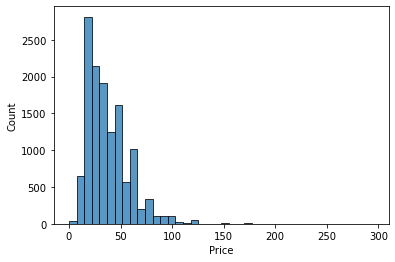

In [49]:
sns.histplot(x='Price',data=new_df,bins=40)

In [50]:
grp = new_df.groupby('Rating')['Price'].mean().reset_index()
grp.corr()

,Rating,Price
Rating,1.000000,0.873161
Price,0.873161,1.000000


In [55]:
grouped_rating = new_df.groupby('AVA')['Rating'].mean().reset_index().sort_values('Rating')
# grouped_rating


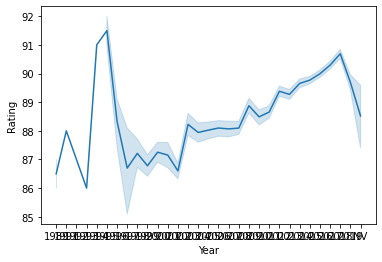

In [524]:
# only_year = final_wine_df.loc[final_wine_df['Year']!='NV']
only_years = new_df.loc[df['Year']!='NV']

sns.lineplot(x='Year',y='Rating',data=only_years.sort_values('Year'))
plt.figure.figsize=(30,5)

<AxesSubplot:xlabel='Year', ylabel='Price'>

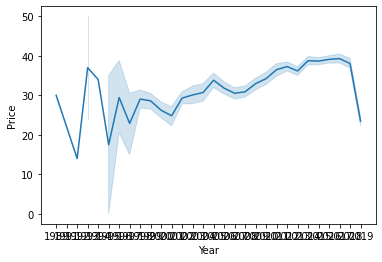

In [503]:
sns.lineplot(x='Year',y='Price',data=only_years.sort_values('Year'))

In [38]:
final_df =  pd.read_csv('Data/Wine Enthusiast Data(Final).csv')

# make new column to hold the links to the reviews

final_df['Links'] = link_list

In [57]:
new_df.to_csv('Data/Wine Enthusiast Data.csv')

In [56]:
new_df

,Index,Title,Producer,Region,AVA,Year,Rating,Price,Review,Links
0,201,Domaine Serene 2016 Monogram Pinot Noir (Dunde...,Domaine Serene,WILLAMETTE VALLEY,Dundee Hills,2016,96,295,Rarely produced and given extended aging in ba...,https://www.winemag.com/buying-guide/domaine-s...
1,5775,Domaine Serene 2012 Monogram Pinot Noir (Willa...,Domaine Serene,WILLAMETTE VALLEY,Willamette Valley,2012,93,275,"As befits this ripe and forward vintage, this ...",https://www.winemag.com/buying-guide/domaine-s...
2,2042,Hors Categorie 2016 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2016,98,260,This project from Christophe Baron comes from ...,https://www.winemag.com/buying-guide/hors-cate...
3,704,Hors Categorie 2017 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2017,96,250,The nose shows classic Walla Walla Valley Syra...,https://www.winemag.com/buying-guide/hors-cate...
4,3126,Hors Categorie 2015 Syrah (Walla Walla Valley ...,Hors Categorie,OREGON OTHER,Walla Walla Valley,2015,96,240,"The domaine name means “without category,” and...",https://www.winemag.com/buying-guide/hors-cate...
...,...,...,...,...,...,...,...,...,...,...
12991,11676,Hamacher 2000 Pinot Noir (Willamette Valley),Hamacher,WILLAMETTE VALLEY,Willamette Valley,2000,88,0,"One of the more evolved examples, Hamacher's 2...",https://www.winemag.com/buying-guide/hamacher-...
12992,11679,Hamacher 1996 Cuvée Forêts Diverses Chardonnay...,Hamacher,WILLAMETTE VALLEY,Willamette Valley,1996,88,0,"Hints of smoke and butter accent honey, pear a...",https://www.winemag.com/buying-guide/hamacher-...
12993,11685,Hamacher 1997 Pinot Noir (Willamette Valley),Hamacher,WILLAMETTE VALLEY,Willamette Valley,1997,87,0,"Slightly lean and beginning to dry out, but th...",https://www.winemag.com/buying-guide/hamacher-...
12994,12163,Oak Knoll 2000 Willamette Valley Pinot Noir (W...,Oak Knoll,WILLAMETTE VALLEY,Willamette Valley,2000,84,0,"Simple and one-dimensional, a wine that has ea...",https://www.winemag.com/buying-guide/oak-knoll...
